# Predictive Analytics: Analisis Penjualan dan Profitabilitas pada Data Superstore

- **Nama:** Adam Firmansyah
- **Email:** adamfirmansyah0802@gmail.com
- **ID Dicoding:** MC009D5Y0435

# Domain Proyek

Penyakit kardiovaskular adalah gangguan pada jantung yang terjadi akibat kurangnya pasokan darah ke otot jantung. Di Indonesia, penyakit ini menjadi penyebab kematian tertinggi kedua setelah stroke, dengan kontribusi yang cukup besar terhadap total kematian. Terdapat hubungan yang erat antara obesitas dan kejadian penyakit kardiovaskular, seperti yang terlihat di rumah sakit umum tertentu. Obesitas dapat memicu peningkatan tekanan darah (hipertensi), kadar trigliserida dan kolesterol, resistensi glukosa, serta risiko terjadinya penggumpalan darah—semuanya merupakan faktor risiko utama penyakit kardiovaskular.

Obesitas sendiri merupakan kondisi kelebihan lemak pada jaringan adiposa dan termasuk salah satu masalah kesehatan yang umum, namun sebenarnya dapat dicegah, misalnya dengan meningkatkan aktivitas fisik. Gaya hidup juga sangat berpengaruh terhadap risiko terjadinya obesitas dan penyakit kardiovaskular. Oleh karena itu, observasi dalam penelitian ini menggunakan sejumlah variabel, yaitu usia (dalam hari), jenis kelamin, tinggi badan, berat badan, tekanan darah, kadar kolesterol, kadar glukosa, kebiasaan merokok, konsumsi alkohol, tingkat aktivitas fisik, dan status apakah seseorang menderita penyakit kardiovaskular atau tidak.

# Business Understanding

## Problem Statements

1. Seberapa akurat model machine learning dapat memprediksi risiko penyakit kardiovaskular berdasarkan fitur-fitur kesehatan individu seperti tekanan darah, kolesterol, dan glukosa?


2. Apakah jenis kelamin dan kelompok usia tertentu memiliki risiko lebih tinggi terhadap penyakit kardiovaskular?

## Goals

1. Menganalisis seberapa akurat model machine learning dalam memprediksi risiko penyakit kardiovaskular berdasarkan variabel-variabel kesehatan seperti tekanan darah, kadar kolesterol, kadar glukosa, serta faktor gaya hidup.

2. Mengidentifikasi hubungan antara jenis kelamin dan kelompok usia dengan kemungkinan menderita penyakit kardiovaskular, guna mengetahui apakah kelompok tertentu memiliki risiko yang lebih tinggi.


## Solution Statements

1. Membangun model prediktif berbasis machine learning, seperti Logistic Regression, Random Forest, atau XGBoost, untuk mengklasifikasikan apakah seseorang berisiko terkena penyakit kardiovaskular berdasarkan data yang tersedia dalam dataset.

2. Melakukan analisis eksploratif dan statistik terhadap data usia dan jenis kelamin untuk mengetahui apakah terdapat pola atau kecenderungan risiko lebih tinggi pada kelompok usia atau gender tertentu.

3. Mengukur performa model dengan metrik evaluasi seperti akurasi, precision, recall, dan F1-score, serta menggunakan confusion matrix untuk menilai efektivitas klasifikasi model.

## Metodologi


Prediksi penyakit cardiovascular adalah tujuan yang ingin dicapai. berdasarkan penelitian yang ada. Dalam predictive metodologi pada proyek ini adalah membangun model klasifikasi dengan cardiovascular sebagai target.

## Metrik

Metrik yang digunakan untuk mengevaluasi seberapa baik model klasifikasi merupakan confusion matrix.

# Data Understanding

Tahap ini merupakan proses analisis data yang bertujuan untuk memperoleh pemahaman yang menyeluruh mengenai dataset sebelum melanjutkan ke tahap analisis lebih lanjut.

#1. Mengimport Library

Tahap ini merupakan proses analisis data yang bertujuan untuk memperoleh pemahaman yang menyeluruh mengenai dataset sebelum melanjutkan ke tahap analisis lebih lanjut.

In [1]:
!pip install kaggle

In [2]:
pip install optuna

In [3]:
pip install catboost

In [4]:
import os
import shutil
import textwrap
import numpy as np
import zipfile
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

# Data loading

tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

In [5]:
!curl -L -o cardiovascular-disease.zip\
  "https://www.kaggle.com/api/v1/datasets/download/sulianova/cardiovascular-disease-dataset"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  742k  100  742k    0     0  1658k      0 --:--:-- --:--:-- --:--:-- 1658k


In [6]:
#membuka zip menjadi folder
with zipfile.ZipFile("/content/cardiovascular-disease.zip", "r") as zip_ref:
    zip_ref.extractall("cardiovascular-disease")

#membaca csv dalam folder
# Specify the encoding as cp1252 when reading the CSV file
data = pd.read_csv("/content/cardiovascular-disease/cardio_train.csv", sep=";")

# Display the first few rows
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**insight**:

- Terdapat 13 Variabel dan juga 70000 data





##**Deskripsi Variabel**

| **Variabel**    | **Deskripsi**                                                                                |
| --------------- | -------------------------------------------------------------------------------------------- |
| **id**          | ID unik untuk setiap entri atau pasien dalam dataset.                                        |
| **age**         | Usia pasien dalam satuan hari. Untuk konversi ke tahun, dapat dibagi dengan 365.             |
| **gender**      | Jenis kelamin pasien, dikodekan sebagai 1 untuk wanita dan 2 untuk pria.                     |
| **height**      | Tinggi badan pasien dalam satuan sentimeter (cm).                                            |
| **weight**      | Berat badan pasien dalam satuan kilogram (kg).                                               |
| **ap\_hi**      | Tekanan darah sistolik pasien (angka atas pada pengukuran tekanan darah).                    |
| **ap\_lo**      | Tekanan darah diastolik pasien (angka bawah pada pengukuran tekanan darah).                  |
| **cholesterol** | Tingkat kolesterol pasien: 1 = normal, 2 = di atas normal, 3 = jauh di atas normal.          |
| **gluc**        | Tingkat glukosa dalam darah pasien: 1 = normal, 2 = di atas normal, 3 = jauh di atas normal. |
| **smoke**       | Status merokok pasien: 1 = ya (pernah atau sedang merokok), 0 = tidak.                       |
| **alco**        | Konsumsi alkohol: 1 = ya (minum alkohol), 0 = tidak.                                         |
| **active**      | Aktivitas fisik: 1 = aktif secara fisik, 0 = tidak aktif.                                    |
| **cardio**      | Label target: 1 = pasien menderita penyakit kardiovaskular, 0 = tidak menderita.             |


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Insight:**
- terdapat 1 variabel bertipe float64 dan 10 variabel bertipe int64

In [8]:
#mengubah feature age dari harian menjadi tahun agar mudah dianalisis
data['umur'] = data['age']/365
data['umur'] = data['umur'].apply(math.ceil)

In [9]:
data.shape

(70000, 14)

Dari Output diatas didapat informasi:
<br>

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 70000 | 13 |


<br>

In [10]:
# Membuat df
df_filtered = pd.DataFrame(data)

In [11]:
df_filtered.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,umur
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,51
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,56
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,49
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


In [12]:
# Memanggil untuk statistik data mengecek outlier.
df_filtered.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,umur
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.837914
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.766821
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah). - 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

# Exploratory Data Analysis - Univariate Analysis

In [13]:
numerical_feature = ['umur', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_feature = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [14]:
feature = categorical_feature
count = df_filtered[feature].value_counts()

# Menghitung jumlah nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
jumlah_unik = df_filtered[feature].nunique()

# Menampilkan nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
nilai_unik = df_filtered[feature].apply(lambda x: x.unique())

# Menampilkan hasil dalam bentuk DataFrame
pd.DataFrame({"Total Nilai Berbeda": jumlah_unik, "Nilai-Nilai": nilai_unik})

,Total Nilai Berbeda,Nilai-Nilai
gender,2,"[2, 1]"
cholesterol,3,"[1, 3, 2]"
gluc,3,"[1, 2, 3]"
smoke,2,"[0, 1]"
alco,2,"[0, 1]"
active,2,"[1, 0]"
cardio,2,"[0, 1]"


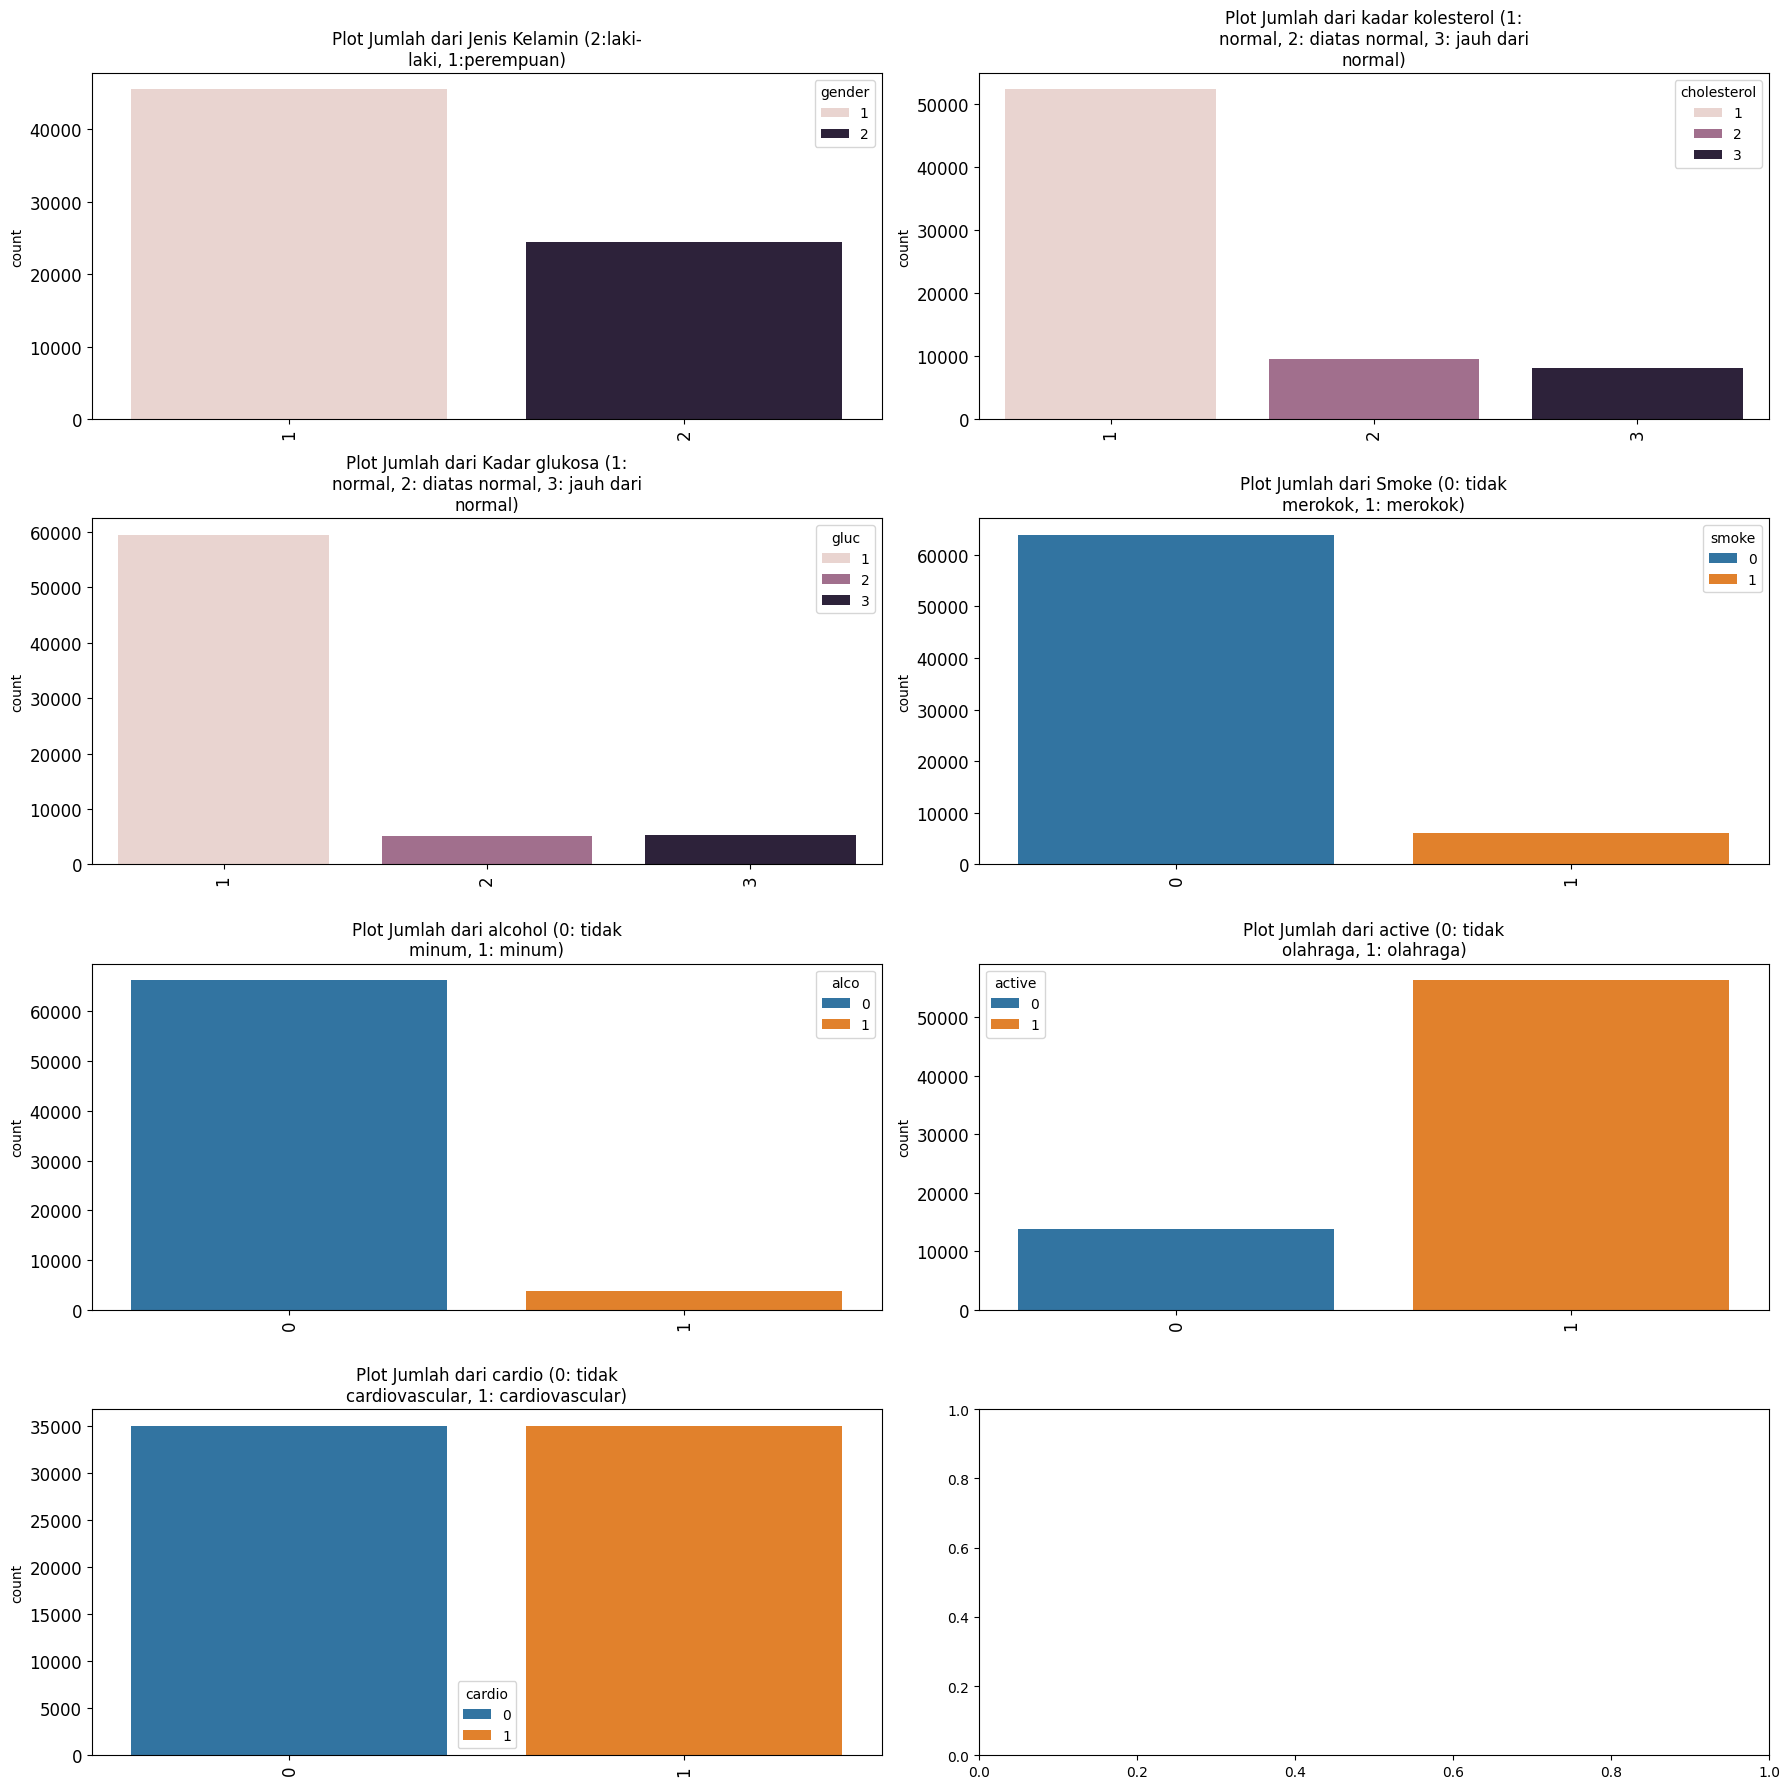

In [15]:
# Membentuk plot dengan subplot sejumlah 9 berukuran 3 x 3
fig, axes = plt.subplots(4, 2, figsize = (18, 18))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Mendeskripsikan kolom-kolom kategorikal yang akan digunakan
deskripsi_kolom_kategorikal = ["Jenis Kelamin (2:laki-laki, 1:perempuan)",
                               "kadar kolesterol (1: normal, 2: diatas normal, 3: jauh dari normal)",
                               "Kadar glukosa (1: normal, 2: diatas normal, 3: jauh dari normal)",
                               "Smoke (0: tidak merokok, 1: merokok)",
                               "alcohol (0: tidak minum, 1: minum)",
                               "active (0: tidak olahraga, 1: olahraga)",
                               "cardio (0: tidak cardiovascular, 1: cardiovascular)"]

# Membentuk plot jumlah dalam bentuk bar plot untuk masing-masing kolom
for i, kolom in enumerate(df_filtered[feature].columns):
    sns.countplot(x = kolom, data = data, ax = axes[i], hue = kolom)

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"Plot Jumlah dari {deskripsi_kolom_kategorikal[i]}", width = 40))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    # Mengatur label x
    axes[i].tick_params(axis = "x", labelrotation = 90)
    axes[i].tick_params(axis = "both", which = "major", labelsize = 12)
    axes[i].set_xlabel("")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight :**

1. Distribusi Jenis Kelamin
Laki-laki (label 2) jauh lebih banyak dibandingkan perempuan (label 1). Hal ini menunjukkan bahwa populasi dalam dataset didominasi oleh pasien laki-laki.

🔹 2. Kadar Kolesterol
Sebagian besar pasien memiliki kadar kolesterol normal (label 1). Namun, ada proporsi signifikan yang memiliki kolesterol di atas normal (label 2) dan jauh di atas normal (label 3), yang menjadi indikator risiko penting terhadap penyakit kardiovaskular.

🔹 3. Kadar Glukosa
Mayoritas pasien memiliki kadar glukosa normal (label 1). Tetapi tetap ada kelompok yang memiliki kadar glukosa tinggi, yang bisa dikaitkan dengan diabetes, salah satu faktor risiko cardiovascular.

🔹 4. Merokok (smoke)
Sebagian besar pasien tidak merokok (label 0). Namun, ada minoritas yang merokok, dan data ini tetap penting karena merokok meningkatkan risiko cardiovascular.

🔹 5. Konsumsi Alkohol (alco)
Mayoritas pasien tidak mengonsumsi alkohol. Konsumsi alkohol relatif rendah dalam dataset, namun tetap relevan sebagai faktor gaya hidup yang berkontribusi terhadap risiko.

🔹 6. Aktivitas Fisik (active)
Sebagian besar pasien terdata aktif secara fisik (label 1). Artinya ada kesadaran olahraga atau aktivitas di antara responden, meskipun tetap ditemukan penderita cardiovascular di kelompok ini.

🔹 7. Penyakit Kardiovaskular (cardio)
Dataset relatif seimbang antara pasien yang menderita penyakit kardiovaskular (label 1) dan yang tidak (label 0). Ini bagus untuk keperluan klasifikasi model machine learning karena tidak terlalu imbalanced.

# Exploratory Data Analysis - Multivariate Analysis

### 1. Distribusi Umur terhadap Risiko Penyakit

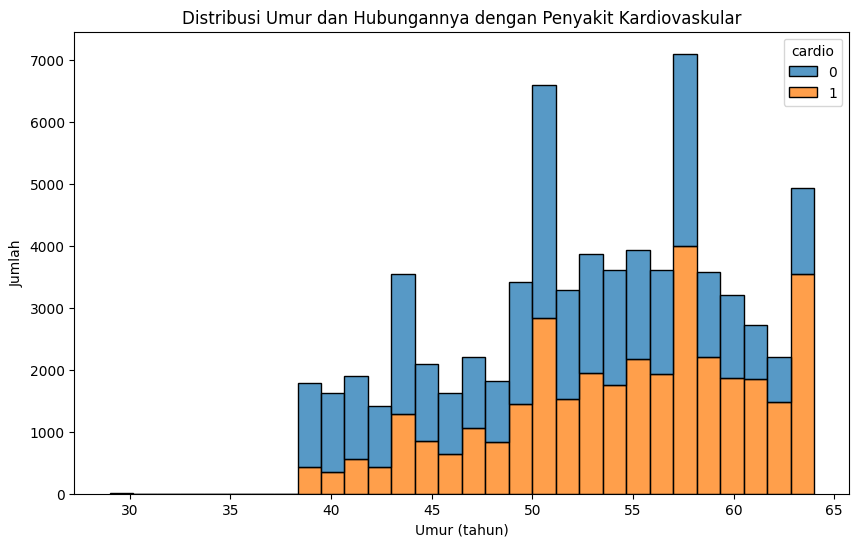

In [16]:
df_filtered['age_years'] = df_filtered['age'] // 365

plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='age_years', hue='cardio', multiple='stack', bins=30)
plt.title('Distribusi Umur dan Hubungannya dengan Penyakit Kardiovaskular')
plt.xlabel('Umur (tahun)')
plt.ylabel('Jumlah')
plt.show()


📌 Insight:

Penyakit kardiovaskular lebih banyak terjadi pada usia di atas 50 tahun.

Usia adalah prediktor penting dalam risiko penyakit ini.

### 2. Distribusi Tekanan Darah Terhadap Risiko Penyakit (Cardio)

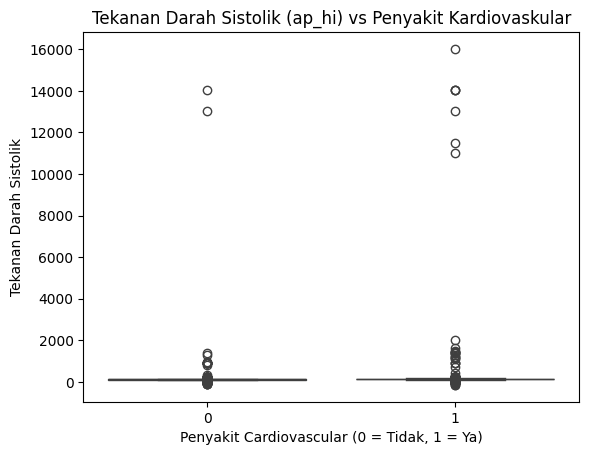

In [17]:
sns.boxplot(x='cardio', y='ap_hi', data=df_filtered)
plt.title('Tekanan Darah Sistolik (ap_hi) vs Penyakit Kardiovaskular')
plt.xlabel('Penyakit Cardiovascular (0 = Tidak, 1 = Ya)')
plt.ylabel('Tekanan Darah Sistolik')
plt.show()



📌 Insight:

Pasien dengan penyakit kardiovaskular cenderung memiliki tekanan darah yang lebih tinggi dibandingkan yang tidak.

### 3. BMI (Body Mass Index) vs Risiko Penyakit

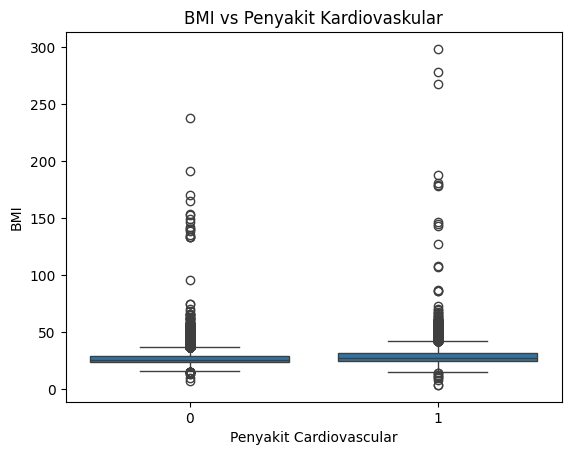

In [18]:
df_filtered['BMI'] = df_filtered['weight'] / ((df_filtered['height'] / 100) ** 2)
sns.boxplot(x='cardio', y='BMI', data=df_filtered)
plt.title('BMI vs Penyakit Kardiovaskular')
plt.xlabel('Penyakit Cardiovascular')
plt.ylabel('BMI')
plt.show()



📌 Insight:

- BMI lebih tinggi tampak lebih sering pada pasien dengan penyakit cardiovascular.

- Obesitas merupakan faktor risiko yang nyata.


### 4. Fitur Lifestyle (Smoke, Alcohol, Active) terhadap Risiko

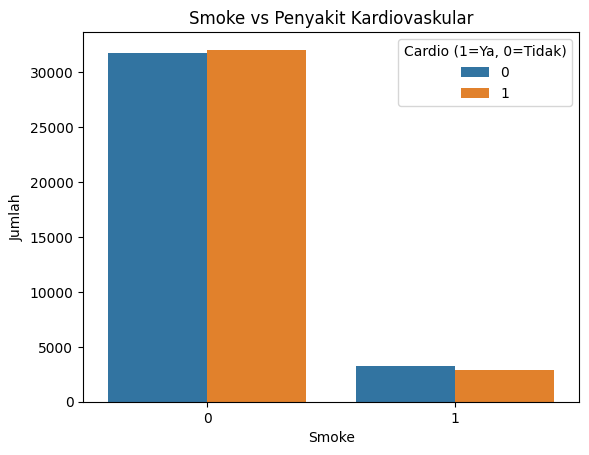

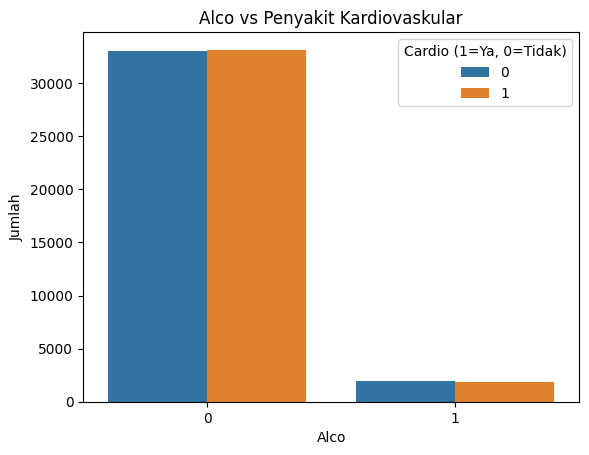

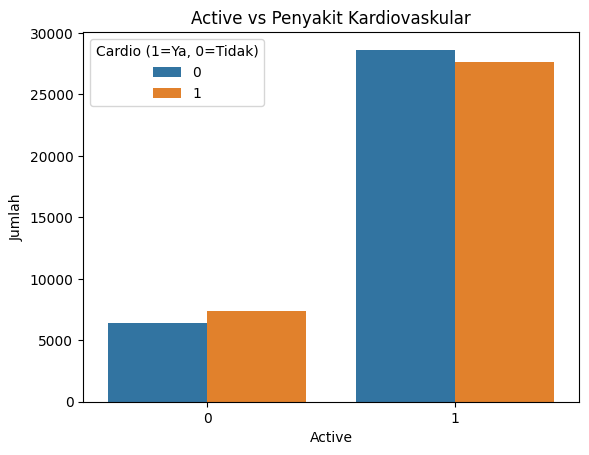

In [19]:
lifestyle_cols = ['smoke', 'alco', 'active']
for col in lifestyle_cols:
    sns.countplot(x=col, hue='cardio', data=df_filtered)
    plt.title(f'{col.capitalize()} vs Penyakit Kardiovaskular')
    plt.xlabel(col.capitalize())
    plt.ylabel('Jumlah')
    plt.legend(title='Cardio (1=Ya, 0=Tidak)')
    plt.show()


📌 Insight:

- Pasien yang tidak aktif berolahraga cenderung memiliki lebih banyak kasus penyakit cardiovascular.

- Pola untuk merokok dan konsumsi alkohol tidak terlalu dominan, mungkin karena datanya imbalanced.

# Data Quality Verification

In [20]:
df_filtered.dtypes


,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


### Memeriksa Data duplikat

In [21]:
df_filtered.duplicated().sum()


np.int64(0)

**Insight :**

- Tidak terdapat data duplikat

### Memeriksa Missing Values

In [22]:
df_filtered.isnull().sum()


,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


**Insight :**

- Tidak terdapat Missing Values

# Data Preparation

## Data Cleaning

### Menangani Duplikat Data

In [23]:
df_cleaned = df_filtered.drop_duplicates()

### Menangani Missing Value

In [24]:
df_cleaned = df_cleaned.dropna()

In [25]:
df_cleaned.shape

(70000, 16)

**Insight:**

Total data setelah dibersihkan menjadi 9994 baris. (masih sama karna data nya sudah bersih)

### Menghapus Kolom Tidak Relevan

In [26]:
df_cleaned = df_filtered.drop(columns=['id', 'age'], errors='ignore')


In [27]:
# Menampilkan tipe data setiap kolom
df_cleaned.dtypes

,0
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64
alco,int64
active,int64


In [28]:
# mengecek apakah terdapat nilai 0 pada masing masing kolom
ag = (df_cleaned['umur'] == 0).sum()
gender = (df_cleaned['gender'] == 0).sum()
hei = (df_cleaned['height'] == 0).sum()
wei = (df_cleaned['weight'] == 0).sum()
hi = (df_cleaned['ap_hi'] == 0).sum()
lo = (df_cleaned['ap_lo'] == 0).sum()
coles = (df_cleaned['cholesterol'] == 0).sum()
glu = (df_cleaned['gluc'] == 0).sum()


print("Nilai 0 di kolom umur: ", ag)
print("Nilai 0 di kolom gender: ", gender)
print("Nilai 0 di kolom height: ", hei)
print("Nilai 0 di kolom weight: ", wei)
print("Nilai 0 di kolom ap_hi: ", hi)
print("Nilai 0 di kolom ap_lo: ", lo)
print("Nilai 0 di kolom chlosterol: ", coles)
print("Nilai 0 di kolom gluc: ", glu)


Nilai 0 di kolom umur:  0
Nilai 0 di kolom gender:  0
Nilai 0 di kolom height:  0
Nilai 0 di kolom weight:  0
Nilai 0 di kolom ap_hi:  0
Nilai 0 di kolom ap_lo:  21
Nilai 0 di kolom chlosterol:  0
Nilai 0 di kolom gluc:  0


**Insight :**

 terdapat nilai 0 pada kolom ap_lo maka sebanyak 21

In [29]:
# menghapus tiap baris yang nilai kolom ap_lo bernilai 0
df_cleaned = df_cleaned[df_cleaned['ap_lo'] != 0]

### Menangani Outlier

In [30]:
# memanggil untuk statistik data setelah dihapus data duplikat dan missing value.
df_cleaned.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,umur,age_years,BMI
count,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000
mean,1.349533,164.359208,74.207567,128.752483,96.659412,1.366896,1.226497,0.088126,0.053773,0.803698,0.499764,53.838051,52.840795,27.557268
std,0.476826,8.210215,14.395255,153.870138,188.493373,0.680264,0.572304,0.283481,0.225571,0.397202,0.500004,6.766532,6.766511,6.091690
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,53.000000,26.377898
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000,58.000000,30.222222
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,64.000000,298.666667


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

In [31]:
df_cleaned.shape

(69979, 14)

In [32]:
#Cek data outlier
numerical_feature = ['umur', 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'BMI']
categorical_feature = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [33]:
#Cek data outlier
numerical_features = [ 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'BMI']
selected_cols = df_cleaned[numerical_features]

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_cleaned[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

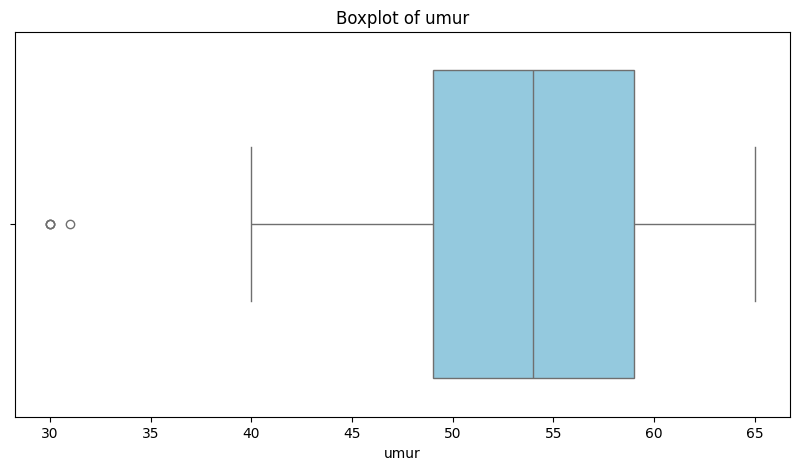

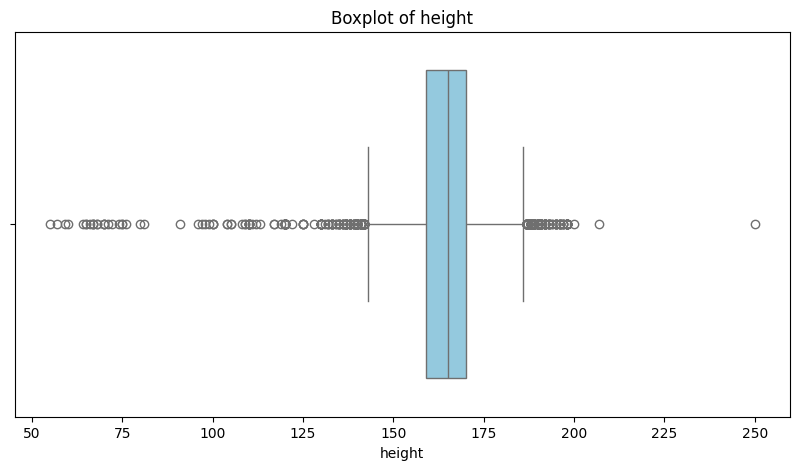

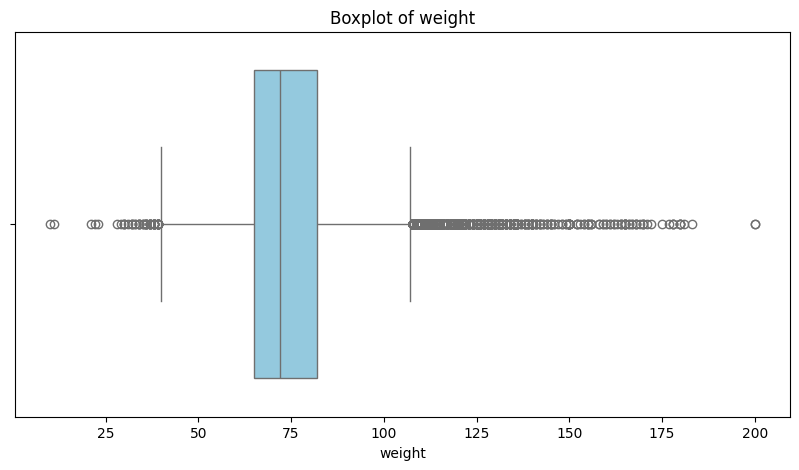

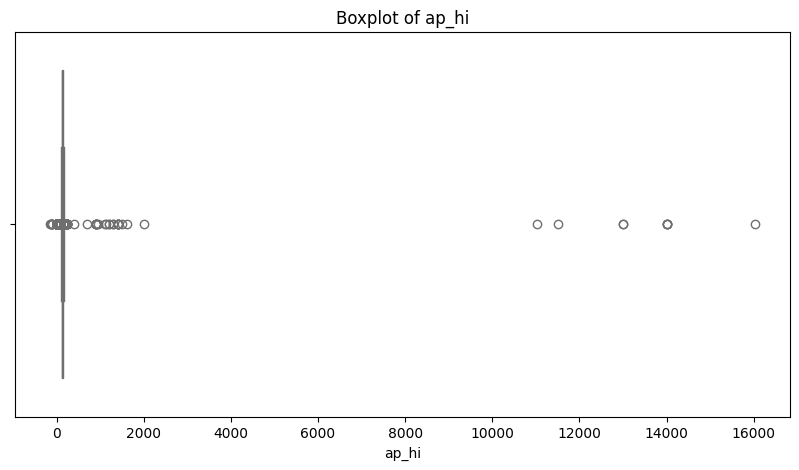

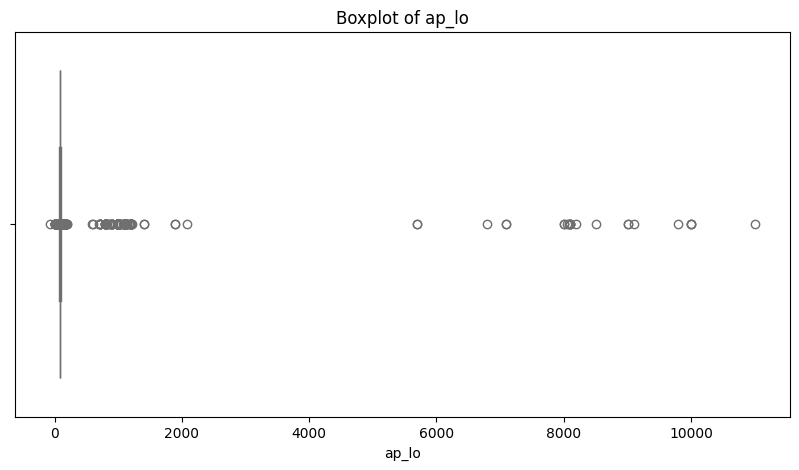

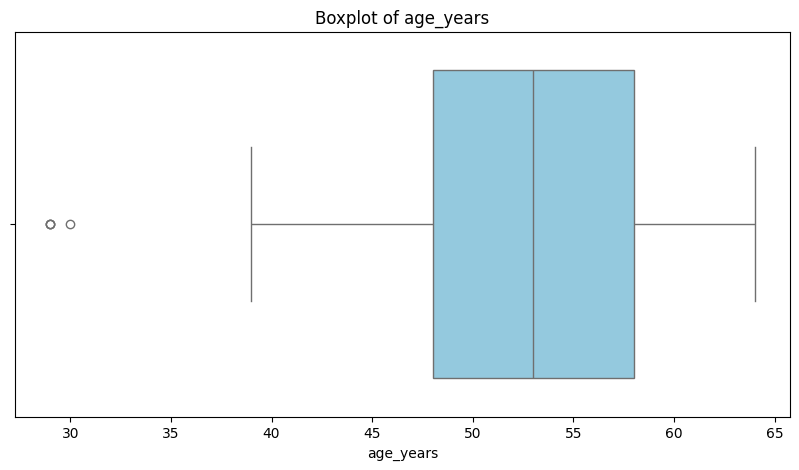

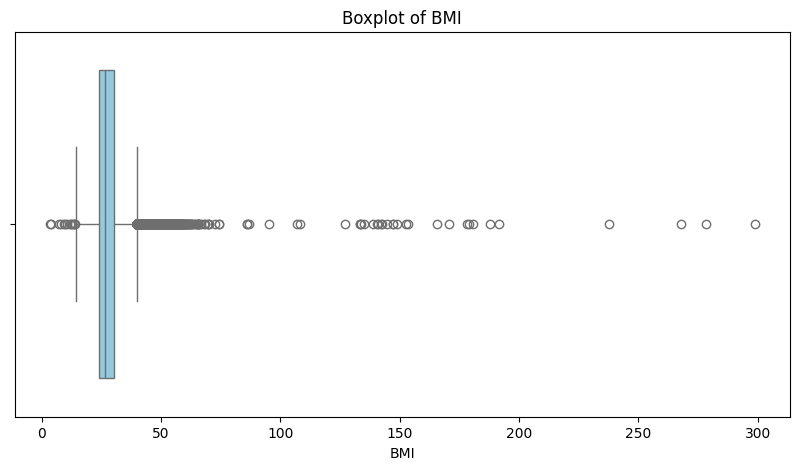

In [34]:
for num in numerical_feature:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned, x=num, color='skyblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

1. Pada variabel Umur, terlihat bahwa sebagian besar responden berada dalam rentang usia 48 hingga 58 tahun. Ditemukan dua data pencilan (outlier) pada usia sekitar 30 tahun ke atas. Namun, data ini tetap dipertahankan karena secara logis masih memungkinkan seseorang berusia di atas 30 tahun mengalami kondisi yang diteliti.

2. Untuk variabel Weight, mayoritas responden memiliki berat badan antara 60 hingga 80 kilogram. Terdapat sejumlah outlier, terutama pada rentang berat 20 hingga 35 kg. Karena nilai tersebut tergolong tidak wajar untuk individu berusia di atas 35 tahun, maka data pencilan ini akan ditindaklanjuti.

3. Pada variabel Height, sebagian besar responden memiliki tinggi badan antara 1,6 hingga 1,7 meter. Meskipun terdapat banyak outlier, data dengan tinggi badan ekstrem seperti 0,5 hingga 1 meter dianggap tidak realistis untuk usia di atas 30 tahun, sehingga akan ditangani lebih lanjut.

4. Pada variabel ap_hi, ditemukan cukup banyak outlier. Data dengan nilai tekanan darah melebihi 500 mmHg atau bernilai negatif dinilai tidak masuk akal secara medis dan akan dihapus dari analisis.

5. Demikian pula, variabel ap_lo menunjukkan adanya outlier dengan nilai ekstrem yang tidak logis secara medis, seperti lebih dari 500 mmHg atau nilai negatif. Oleh karena itu, data tersebut juga akan dihapus.

6. Terdapat dua outlier di sisi kiri (sekitar usia 29–30 tahun). Meskipun demikian, usia ini masih tergolong realistis, terutama jika penelitian ini tidak membatasi usia minimum responden.

7. Terdapat jumlah outlier yang sangat banyak, bahkan mencapai nilai di atas 300, yang secara medis tidak mungkin terjadi. Outlier ekstrem ini menunjukkan adanya anomali data, kemungkinan besar akibat kesalahan input atau pencatatan data.

In [35]:
# Tangani outlier pada weight: buang jika < 36 kg (terlalu rendah)
df_filtered = df_filtered[df_filtered['weight'] >= 36]

# Tangani outlier pada height: buang jika < 100 cm atau > 250 cm (tidak realistis)
df_filtered = df_filtered[(df_filtered['height'] >= 100) & (df_filtered['height'] <= 250)]

# Tangani outlier pada ap_hi: buang jika <= 0 atau > 250 (tekanan darah tidak valid)
df_filtered = df_filtered[(df_filtered['ap_hi'] > 0) & (df_filtered['ap_hi'] <= 250)]

# Tangani outlier pada ap_lo: buang jika <= 0 atau > 200 (tekanan darah tidak valid)
df_filtered = df_filtered[(df_filtered['ap_lo'] > 0) & (df_filtered['ap_lo'] <= 200)]

# Tangani outlier pada BMI: buang jika BMI < 10 atau > 60 (tidak mungkin secara medis)
df_filtered = df_filtered[(df_filtered['BMI'] >= 10) & (df_filtered['BMI'] <= 60)]

# Cetak ukuran dataset sebelum dan sesudah
print("Ukuran awal dataset:", df_cleaned.shape)
print("Ukuran setelah pembersihan outlier:", df_filtered.shape)

Ukuran awal dataset: (69979, 14)
Ukuran setelah pembersihan outlier: (61789, 14)


## Split Train Test

Karna salah satu problem statement dalam analisis ini adalah mengevaluasi pengaruh diskon terhadap profit. Dengan menjadikan Profit sebagai target, kita bisa langsung melihat dan mengukur seberapa besar dampak fitur-fitur lain terhadap profit tersebut.



In [36]:
X = df_filtered.drop(['cardio'], axis=1)
y = df_filtered['cardio']

# Proceed with the train-test split using the processed X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

Lalu, kita membagi data menjadi 2, yaitu

- Data training sebesar 80% untuk melatih model
- Data testing sebesar 20% untuk menguji model

In [37]:
# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (49431, 13)
Ukuran X_test:  (12358, 13)
Ukuran y_train:  (49431,)
Ukuran y_test:  (12358,)


In [38]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 61789
Total # of sample in train dataset: 49431
Total # of sample in test dataset: 12358


## Standarisasi

In [39]:
# scaling untuk data training
numerical_features= ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'BMI']
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,height,weight,ap_hi,ap_lo,age_years,BMI
21759,0.511628,0.671642,0.375,0.375,0.12,0.662228
33104,0.255814,0.238806,0.750,0.625,1.00,0.360406
63819,0.348837,0.298507,0.750,0.625,0.84,0.377140
50999,0.767442,0.343284,0.250,0.125,0.36,0.230513
17359,0.651163,0.626866,0.700,0.825,0.44,0.536141


In [40]:
# scaling untuk data testing
numerical_features= ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'BMI']
scaler = MinMaxScaler()
scaler.fit(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

,height,weight,ap_hi,ap_lo,age_years,BMI
32145,0.627907,0.597015,0.375,0.375,0.04,0.505498
1729,1.000000,0.552239,0.250,0.625,0.68,0.282962
51314,0.558140,0.417910,0.375,0.375,0.20,0.370153
34249,0.697674,0.776119,0.500,0.375,0.36,0.630934
47587,0.418605,0.507463,0.375,0.375,0.40,0.541048


# Modelling


📊 Evaluasi Model: Logistic Regression
=== Classification Report ===
                        precision    recall  f1-score   support

Terkena Cardiovascular       0.70      0.79      0.74      6265
    Non Cardiovascular       0.75      0.65      0.70      6093

              accuracy                           0.72     12358
             macro avg       0.72      0.72      0.72     12358
          weighted avg       0.72      0.72      0.72     12358



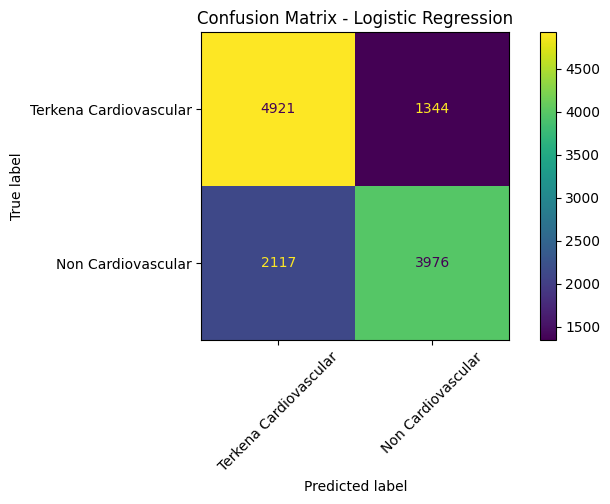


📊 Evaluasi Model: Random Forest
=== Classification Report ===
                        precision    recall  f1-score   support

Terkena Cardiovascular       0.70      0.73      0.71      6265
    Non Cardiovascular       0.71      0.68      0.70      6093

              accuracy                           0.71     12358
             macro avg       0.71      0.71      0.71     12358
          weighted avg       0.71      0.71      0.71     12358



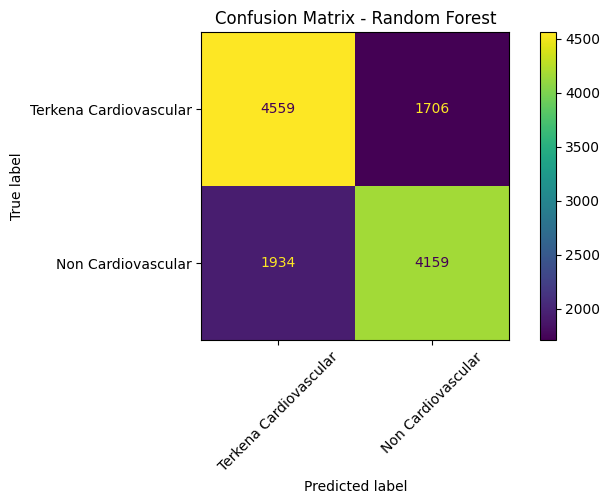


📊 Evaluasi Model: K-Nearest Neighbors
=== Classification Report ===
                        precision    recall  f1-score   support

Terkena Cardiovascular       0.67      0.70      0.69      6265
    Non Cardiovascular       0.68      0.65      0.66      6093

              accuracy                           0.68     12358
             macro avg       0.68      0.67      0.67     12358
          weighted avg       0.68      0.68      0.68     12358



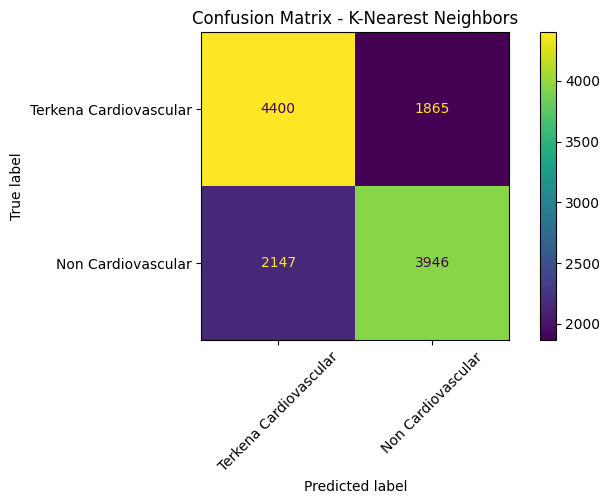


📊 Evaluasi Model: Support Vector Machine
=== Classification Report ===
                        precision    recall  f1-score   support

Terkena Cardiovascular       0.66      0.77      0.71      6265
    Non Cardiovascular       0.71      0.60      0.65      6093

              accuracy                           0.68     12358
             macro avg       0.69      0.68      0.68     12358
          weighted avg       0.69      0.68      0.68     12358



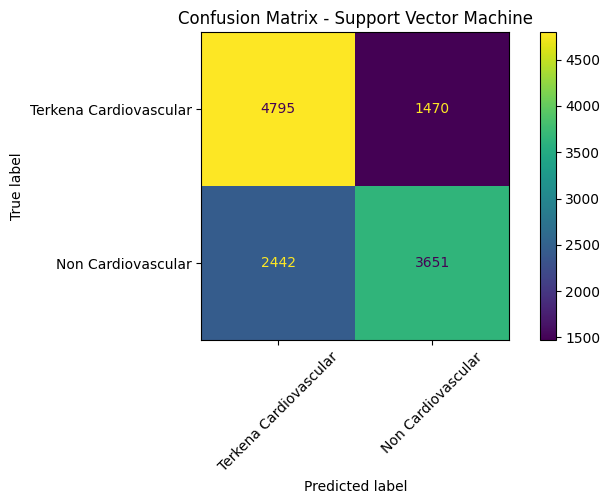


📊 Evaluasi Model: Decision Tree
=== Classification Report ===
                        precision    recall  f1-score   support

Terkena Cardiovascular       0.63      0.63      0.63      6265
    Non Cardiovascular       0.62      0.62      0.62      6093

              accuracy                           0.62     12358
             macro avg       0.62      0.62      0.62     12358
          weighted avg       0.62      0.62      0.62     12358



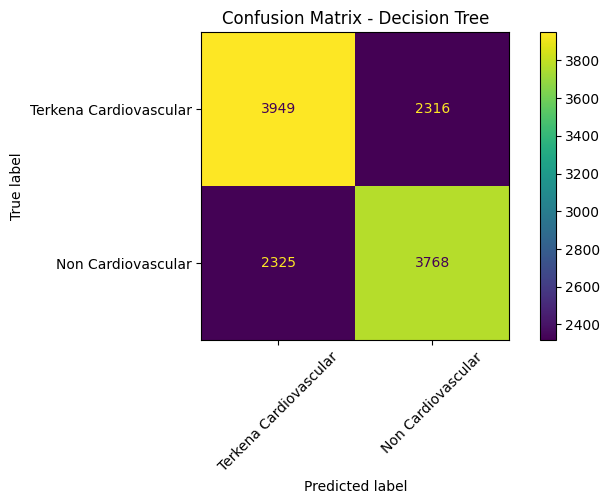


📊 Evaluasi Model: Gradient Boosting
=== Classification Report ===
                        precision    recall  f1-score   support

Terkena Cardiovascular       0.71      0.78      0.75      6265
    Non Cardiovascular       0.75      0.68      0.71      6093

              accuracy                           0.73     12358
             macro avg       0.73      0.73      0.73     12358
          weighted avg       0.73      0.73      0.73     12358



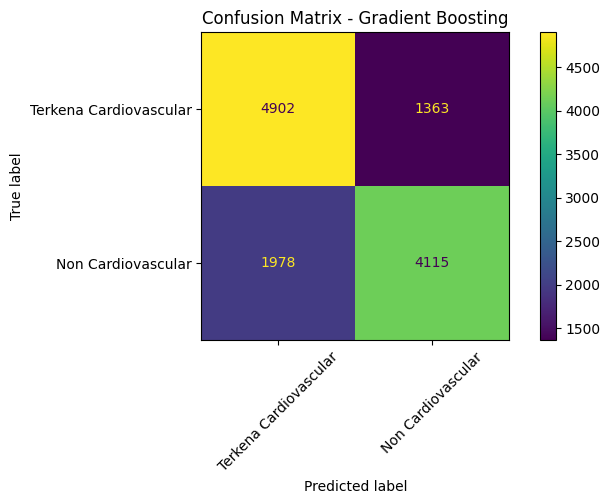


📊 Evaluasi Model: AdaBoost
=== Classification Report ===
                        precision    recall  f1-score   support

Terkena Cardiovascular       0.69      0.81      0.75      6265
    Non Cardiovascular       0.76      0.63      0.69      6093

              accuracy                           0.72     12358
             macro avg       0.73      0.72      0.72     12358
          weighted avg       0.73      0.72      0.72     12358



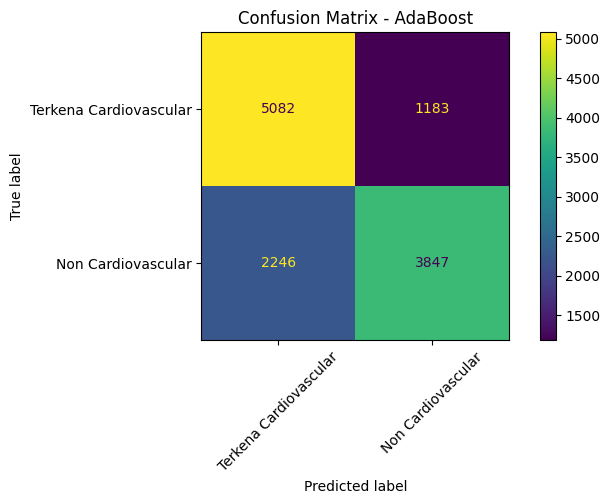


📊 Evaluasi Model: Naive Bayes
=== Classification Report ===
                        precision    recall  f1-score   support

Terkena Cardiovascular       0.68      0.79      0.73      6265
    Non Cardiovascular       0.74      0.63      0.68      6093

              accuracy                           0.71     12358
             macro avg       0.71      0.71      0.71     12358
          weighted avg       0.71      0.71      0.71     12358



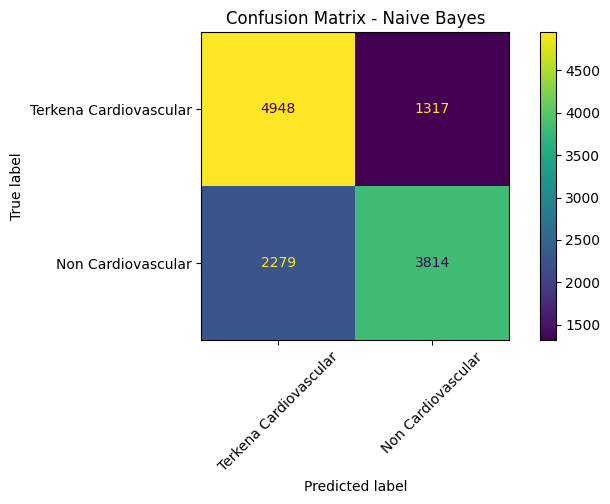

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def make_evaluation(y_true, y_pred, title="Confusion Matrix",
                    labels=['Terkena Cardiovascular', 'Non Cardiovascular'],
                    save=False, filename="conf_matrix.png"):
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=labels))

    fig, ax = plt.subplots(figsize=(8, 4))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax, display_labels=labels)
    ax.xaxis.set_ticklabels(labels, rotation=45)
    ax.yaxis.set_ticklabels(labels)
    ax.grid(False)
    ax.set_title(title)

    if save:
        plt.savefig(filename, bbox_inches='tight')

    plt.show()


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # Jika xgboost sudah terinstall
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📊 Evaluasi Model: {name}")
    make_evaluation(y_test, y_pred, title=f"Confusion Matrix - {name}")


In [42]:
from sklearn.metrics import accuracy_score

# Buat dictionary untuk simpan akurasi model
accuracy_scores = {}

# Hitung akurasi dari prediksi yang sebelumnya sudah dilakukan
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc

# Urutkan model berdasarkan akurasi tertinggi
sorted_accuracy = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

# Tampilkan ranking
print("\n📈 Ranking Model Berdasarkan Akurasi:")
for i, (name, acc) in enumerate(sorted_accuracy, 1):
    print(f"{i}. {name}: {acc:.4f}")



📈 Ranking Model Berdasarkan Akurasi:
1. Gradient Boosting: 0.7296
2. AdaBoost: 0.7225
3. Logistic Regression: 0.7199
4. Naive Bayes: 0.7090
5. Random Forest: 0.7055
6. Support Vector Machine: 0.6834
7. K-Nearest Neighbors: 0.6754
8. Decision Tree: 0.6245


**📌 Insight:**

Model Gradient Boosting mampu mengklasifikasikan pasien dengan akurasi sekitar 73%, menunjukkan performa yang layak untuk digunakan dalam prediksi risiko awal.

Model ini mengungguli metode klasik seperti Logistic Regression dan Decision Tree, berkat kemampuannya menangkap kompleksitas interaksi antar variabel.

In [50]:
best_model = models['Gradient Boosting']
best_model.fit(X_train, y_train)  # pastikan model sudah dilatih


GradientBoostingClassifier(random_state=42)

In [45]:
import joblib

# Simpan model ke file
joblib.dump(best_model, 'gradient_boosting_model.pkl')
print("Model berhasil disimpan ke 'gradient_boosting_model.pkl'")


Model berhasil disimpan ke 'gradient_boosting_model.pkl'


# Menjawab Problems

## 1. Menganalisis seberapa akurat model machine learning dalam memprediksi risiko penyakit kardiovaskular berdasarkan variabel-variabel kesehatan seperti tekanan darah, kadar kolesterol, kadar glukosa, serta faktor gaya hidup.

In [47]:
print("Jumlah fitur:", X_train.shape[1])
print("Nama fitur:", X_train.columns.tolist())


Jumlah fitur: 13
Nama fitur: ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'umur', 'age_years', 'BMI']


In [49]:
import numpy as np
import joblib

# Load model
model = joblib.load('gradient_boosting_model.pkl')

# Contoh data baru (isi dengan nilai realistis sesuai domain)
# Format: [gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, umur, age_years, BMI]
new_data = np.array([[1, 169, 90, 120, 80, 2, 1, 0, 0, 1, 20000, 55, 25.7]])  # Ubah nilainya sesuai kasus nyata

new_data = new_data.reshape(1, -1)

# Prediksi
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)

# Interpretasi hasil
hasil = "⚠️ Terkena Cardiovascular" if prediction[0] == 1 else "✅ Tidak Terkena Cardiovascular"
print(f"Hasil Prediksi: {hasil}")
print(f"Probabilitas: {probability[0][prediction[0]]:.2f}")


Hasil Prediksi: ⚠️ Terkena Cardiovascular
Probabilitas: 0.84


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


**Hasil Prediksi:**

✅ Prediksi: ⚠️ Terkena Cardiovascular

✅ Probabilitas: 84%

**📌 Insight:**

- Meskipun tekanan darah dan glukosa terlihat normal, tinggi badan dan berat badan menyebabkan BMI yang sedikit di atas normal, serta kolesterol di atas normal (2) dapat menjadi faktor risiko yang signifikan.

- Model mengidentifikasi pasien ini sebagai berisiko tinggi terkena penyakit kardiovaskular, dengan keyakinan cukup tinggi (84%), mengindikasikan model sensitif terhadap fitur-fitur kesehatan utama seperti kolesterol dan BMI.

**✅ Kesimpulan Insight**

- Model Gradient Boosting adalah model terbaik, dengan akurasi sekitar 73%, dan cocok digunakan untuk analisis risiko awal.

- Model berhasil mengenali kombinasi dari faktor gaya hidup dan parameter klinis (kolesterol, glukosa, tekanan darah, BMI, usia) untuk memprediksi risiko penyakit kardiovaskular.

- Dengan probabilitas tinggi (84%) dalam prediksi data baru, model ini cukup andal digunakan sebagai sistem pendukung keputusan medis, meskipun tetap perlu validasi lanjutan oleh tenaga medis profesional.



## 2. Apakah jenis kelamin dan kelompok usia tertentu memiliki risiko lebih tinggi terhadap penyakit kardiovaskular?

<ipython-input-53-3d89019f31d0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_group = df_filtered.groupby(['gender', 'age_group'])['cardio'].mean().unstack()


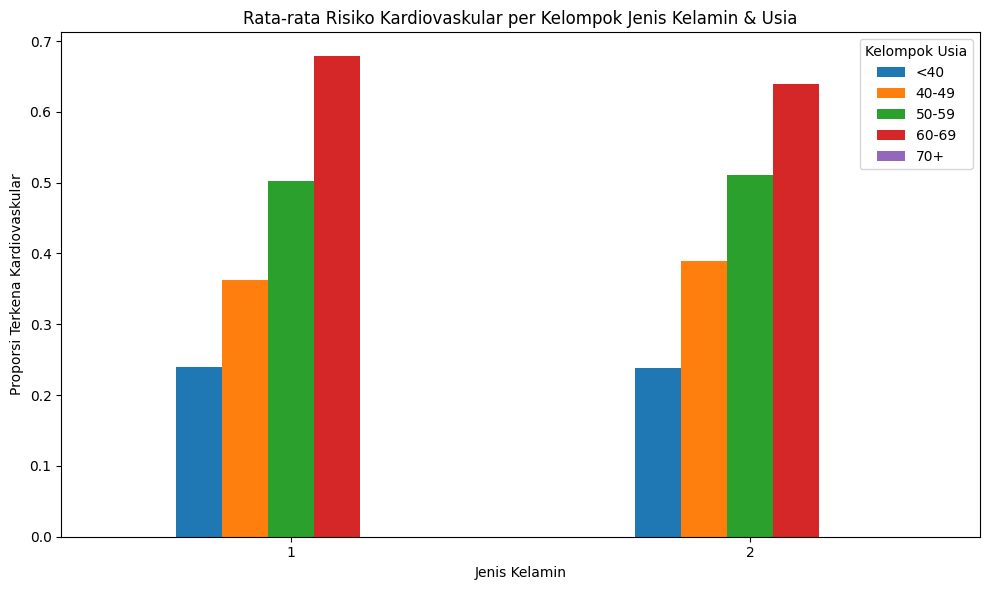

In [53]:
age_bins = [0, 40, 50, 60, 70, 100]
age_labels = ['<40', '40-49', '50-59', '60-69', '70+']
df_filtered['age_group'] = pd.cut(df_filtered['age_years'], bins=age_bins, labels=age_labels, right=False)

# Kelompokkan berdasarkan gender & age_group
risk_by_group = df_filtered.groupby(['gender', 'age_group'])['cardio'].mean().unstack()

risk_by_group.plot(kind='bar', figsize=(10, 6))
plt.title("Rata-rata Risiko Kardiovaskular per Kelompok Jenis Kelamin & Usia")
plt.ylabel("Proporsi Terkena Kardiovaskular")
plt.xlabel("Jenis Kelamin")
plt.xticks(rotation=0)
plt.legend(title="Kelompok Usia")
plt.tight_layout()
plt.show()

**📊 Interpretasi dari Grafik**

- Kedua jenis kelamin memiliki pola yang mirip: risiko meningkat seiring bertambahnya usia.

- Pria usia 60-69 memiliki proporsi tertinggi terkena penyakit kardiovaskular (~68%).

- Wanita usia 60-69 juga sangat tinggi (~64%), sedikit lebih rendah dari pria.

- Kelompok usia di bawah 40 memiliki proporsi risiko yang jauh lebih rendah (< 25%) untuk kedua gender.

**Kesimpulan**

- Risiko meningkat secara signifikan setelah usia 40 tahun, paling tinggi di kelompok 60-69 tahun.

- Pria memiliki sedikit risiko lebih tinggi dibanding wanita pada semua kelompok usia.